In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [5]:
file_path = "5104tables.xlsx"
df_learning_rate = pd.read_excel(file_path, sheet_name="Sheet13")
df_data_volume = pd.read_excel(file_path, sheet_name="Sheet14")
df_missing = pd.read_excel(file_path, sheet_name="Sheet15")
df_noise = pd.read_excel(file_path, sheet_name="Sheet16")

df_missing_long = pd.melt(df_missing, id_vars=["missing rate"], 
                          value_vars=["MSE", "MAE"],
                          var_name="Metric", value_name="Value")

df_noise_long = pd.melt(df_noise, id_vars=["input noise"], 
                        value_vars=["MSE", "MAE"],
                        var_name="Metric", value_name="Value")

df_learning_rate_long = pd.melt(df_learning_rate, id_vars=["learning rate"],
                                 value_vars=["MSE", "MAE"],
                                 var_name="Metric", value_name="Value")
df_data_volume_long = pd.melt(df_data_volume, id_vars=["data volume"],
                              value_vars=["MSE", "MAE"],
                              var_name="Metric", value_name="Value")
df_missing_long.head()
df_noise_long.head()
df_learning_rate_long.head()
df_data_volume_long.head()

,data volume,Metric,Value
0,0.25,MSE,0.940399
1,0.50,MSE,1.260777
2,1.00,MSE,0.157749
3,0.25,MAE,0.596511
4,0.50,MAE,0.520444


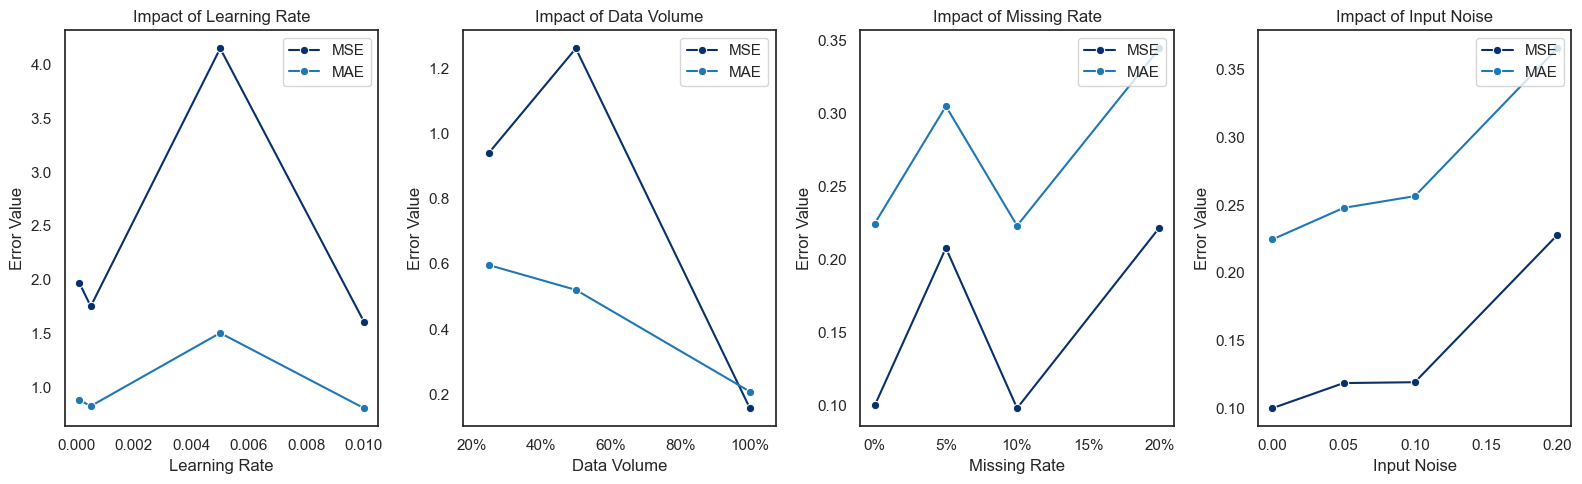

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
sns.set(style="white")
custom_blue_palette = ['#08306B', '#1f77b4']
# Learning Rate
sns.lineplot(data=df_learning_rate_long, x="learning rate", y="Value", hue="Metric", marker="o", ax=axs[0],palette=custom_blue_palette)
axs[0].set_title("Impact of Learning Rate")
axs[0].set_xlabel("Learning Rate")
axs[0].set_ylabel("Error Value")
axs[0].legend(loc="upper right")

# Data Volume
sns.lineplot(data=df_data_volume_long, x="data volume", y="Value", hue="Metric", marker="o", ax=axs[1], palette=custom_blue_palette)    
axs[1].set_title("Impact of Data Volume")
axs[1].set_xlabel("Data Volume")
axs[1].set_ylabel("Error Value")
axs[1].legend(loc="upper right")
axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
axs[1].margins(x=0.1)   

# Missing Rate
sns.lineplot(data=df_missing_long, x="missing rate", y="Value", hue="Metric", marker="o", ax=axs[2], palette=custom_blue_palette)
axs[2].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
axs[2].set_title("Impact of Missing Rate")
axs[2].set_xlabel("Missing Rate")
axs[2].set_ylabel("Error Value")
axs[2].legend(loc="upper right")

# Input Noise
sns.lineplot(data=df_noise_long, x="input noise", y="Value", hue="Metric", marker="o", ax=axs[3], palette=custom_blue_palette)
axs[3].set_title("Impact of Input Noise")
axs[3].set_xlabel("Input Noise")
axs[3].set_ylabel("Error Value")
axs[3].legend(loc="upper right")

plt.tight_layout()
plt.xticks()
plt.show()
